# Tabular Kaggle Project
Name: Franklin Osualaaham 
Date: 02 May 2025  
DATA 3402 PROJECT

Guideline for steps for the Kaggle Tabular Project. You will "turn in" a GitHub repository, modeled after [Project Template](https://github.com/UTA-DataScience/ProjectTempate) on the day of the final, Friday, May 2 at 11 – 1:30 pm. During the final period we will have about 5 minutes to go over your project and your results.

You can find a list of possible Tabular datasets here on [Excel File in Teams](https://mavsuta.sharepoint.com/:x:/r/teams/Course_2252_data_3402_001-NLyiqHJ5btv8Y/Shared%20Documents/General/Kaggle%20Tabular%20Datasets.xlsx?d=w34cdd3378d1146a2ab63700189a8c5b5&csf=1&web=1&e=6ASD5s). You are not limited to these datasets. If you find a Kaggle challenge not listed that you would like to attempt, please go check with Dr. Farbin to make sure it is viable.

This notebook outlines the steps you should follow. The file(s) in the GitHub repository should contain these steps. Note that you will be only considering classification projects.

## Define Project

* Provide Project link. 
* Short paragraph describing the challenge. 
* Briefly describe the data.

1. Provide Project link: https://www.kaggle.com/datasets/uciml/mushroom-classification

2. Short paragraph describing the challenge:The dataset comprises 23 features describing mushroom attributes—such as cap shape, odor, ring type, population, habitat, and more. It contains 8,124 observations (excluding the header row), each labeled as either edible or poisonous.   

3. Briefly describe the data:The dataset comprises 23 features describing mushroom attributes—such as cap shape, odor, ring type, population, habitat, and more. It contains 8,124 observations (excluding the header row), each labeled as either edible or poisonous.  



## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [38]:
# Loading the data
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [39]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
# Count the number of rows (data points) and features.
total_rows, total_columns=df.shape
print(f"Rows: {total_rows}") 
print(f"Columns: {total_columns}")

df.columns

Rows: 8124
Columns: 23


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [41]:
# Any missing values? 
(df=='?').sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [42]:
# Make a the table showingm feature type, values, missing values, and outliers
table=[]

for column in df.columns:
    if df[column].dtype=="object":
        column_type="Categorical"
        unique_values=df[column].unique()
        values=", ".join(sorted(unique_values))
        outliers="N/A"
    else:
        column_type="Numerical"
        min_value=df[column].min()
        max_value=df[column].max()
        values=f'{min_value} to {max_value}'
        q1=df[column].quantile(0.25)
        q3=df[column].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        outlier_count=((df[column]<lower_bound)|(df[column]>upper_bound)).sum()
        outliers='Yes' if outlier_count>0 else 'No'
        
    missing_count=df[column].isnull().sum()
    table.append([column, column_type, values, missing_count, outliers])

table2=pd.DataFrame(table, columns=['Feature', 'Type', 'Values', 'Missing Values', 'Outliers'])
print(table2)

                     Feature         Type                              Values  \
0                      class  Categorical                                e, p   
1                  cap-shape  Categorical                    b, c, f, k, s, x   
2                cap-surface  Categorical                          f, g, s, y   
3                  cap-color  Categorical        b, c, e, g, n, p, r, u, w, y   
4                    bruises  Categorical                                f, t   
5                       odor  Categorical           a, c, f, l, m, n, p, s, y   
6            gill-attachment  Categorical                                a, f   
7               gill-spacing  Categorical                                c, w   
8                  gill-size  Categorical                                b, n   
9                 gill-color  Categorical  b, e, g, h, k, n, o, p, r, u, w, y   
10               stalk-shape  Categorical                                e, t   
11                stalk-root

In [43]:
# For classification is there class imbalance?
class_imbalance=df['class'].value_counts() 
print(class_imbalance)
# Only a 292 difference in a dataset of 8124, so no imbalance

class
e    4208
p    3916
Name: count, dtype: int64


In [44]:
# What is the target - Classification: how is the target encoded (e.g. 0 and 1)?

label_encoder=LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])

# Target is the class feature and is encoded using label encoding 

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

<Figure size 1000x600 with 0 Axes>

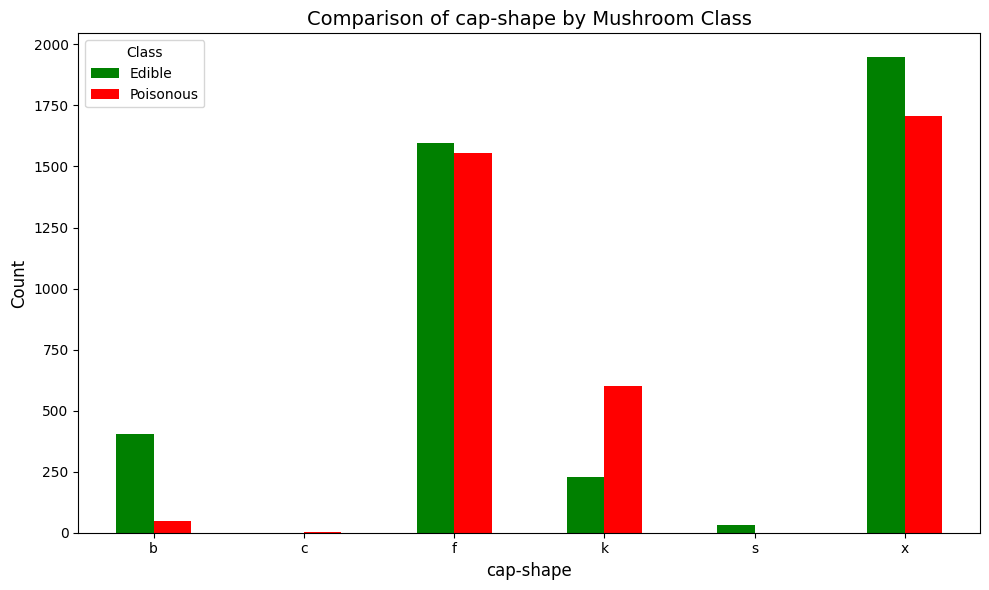

<Figure size 1000x600 with 0 Axes>

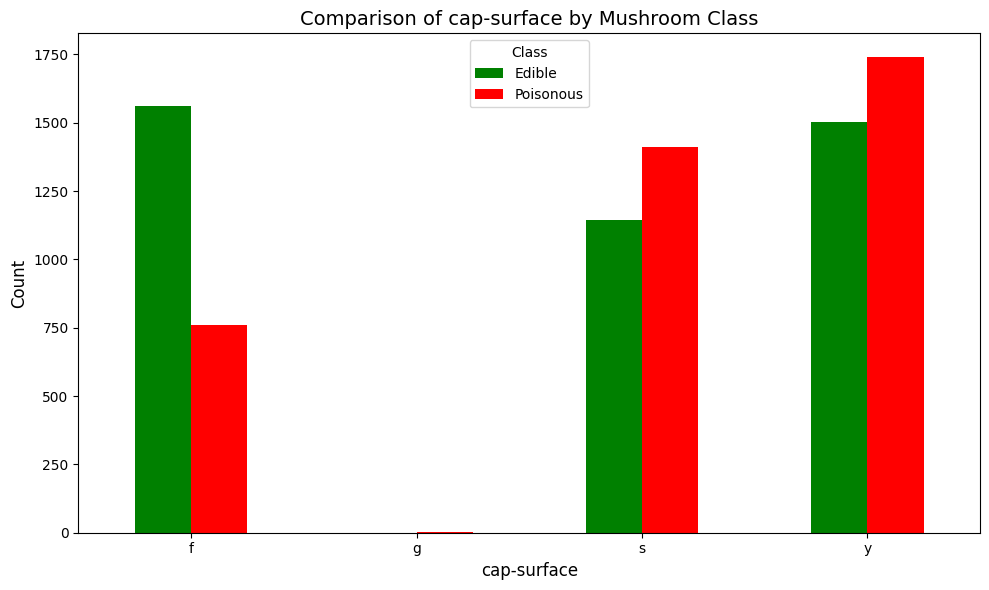

<Figure size 1000x600 with 0 Axes>

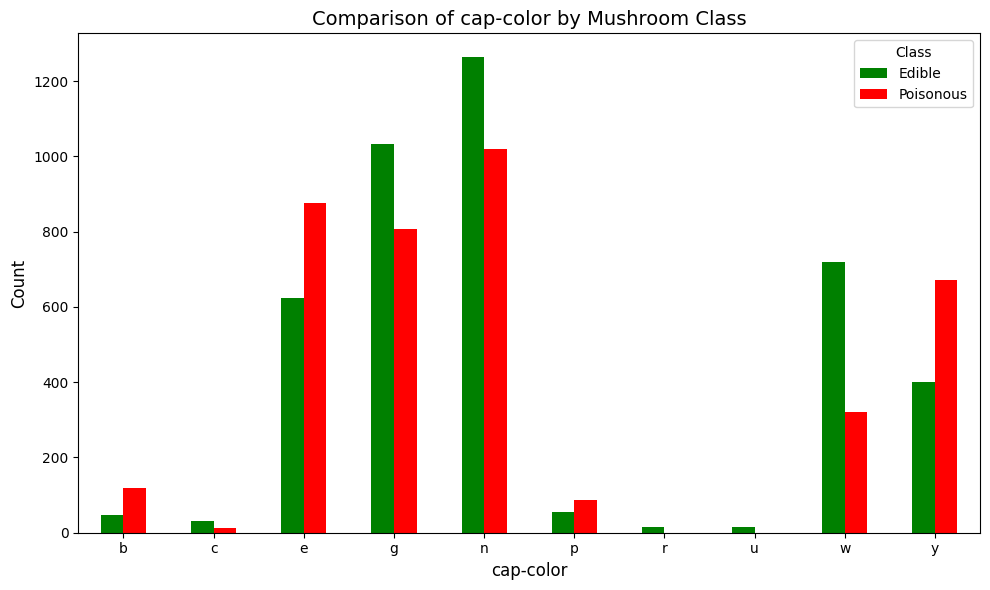

<Figure size 1000x600 with 0 Axes>

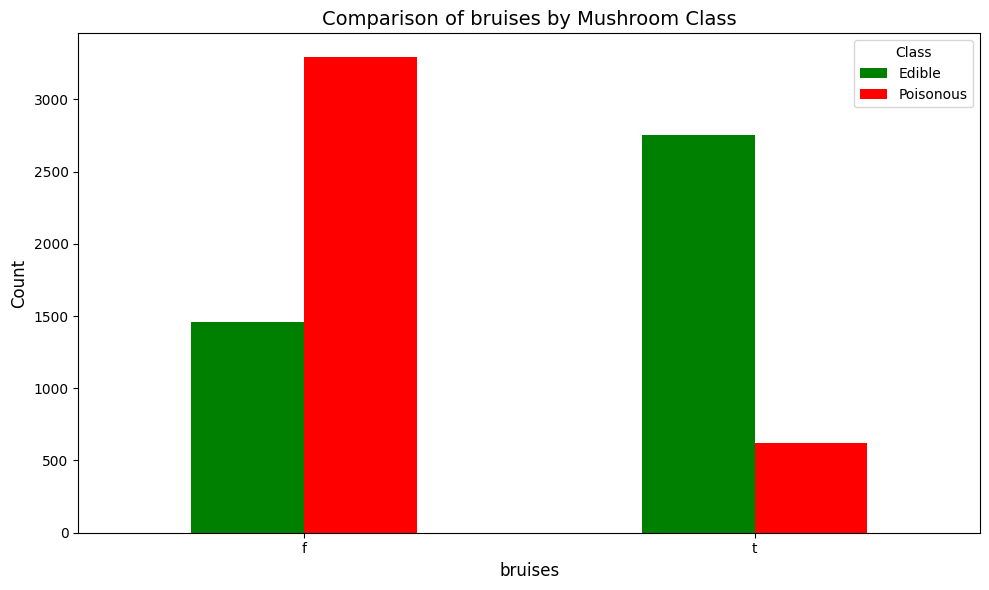

<Figure size 1000x600 with 0 Axes>

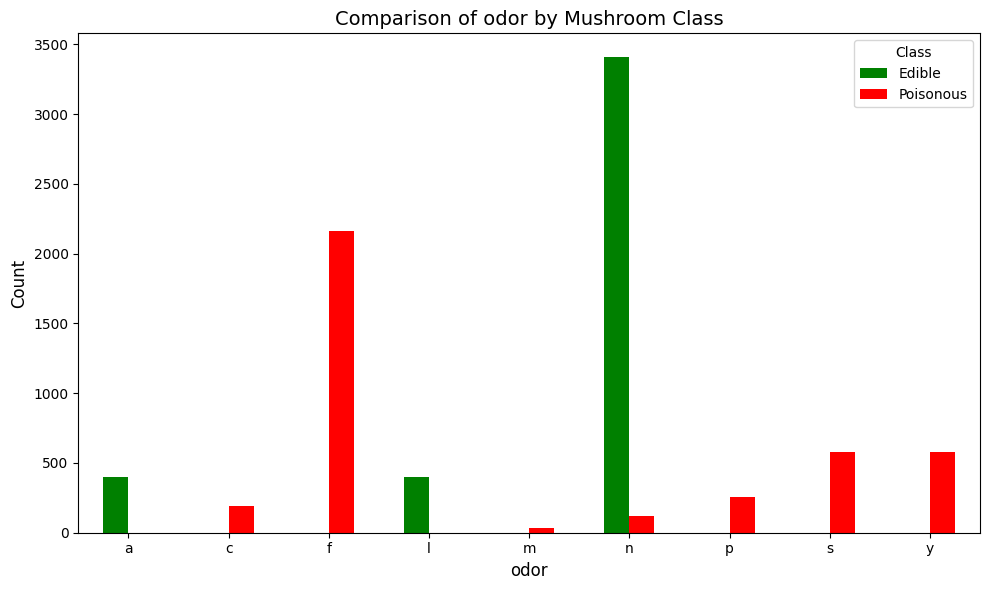

<Figure size 1000x600 with 0 Axes>

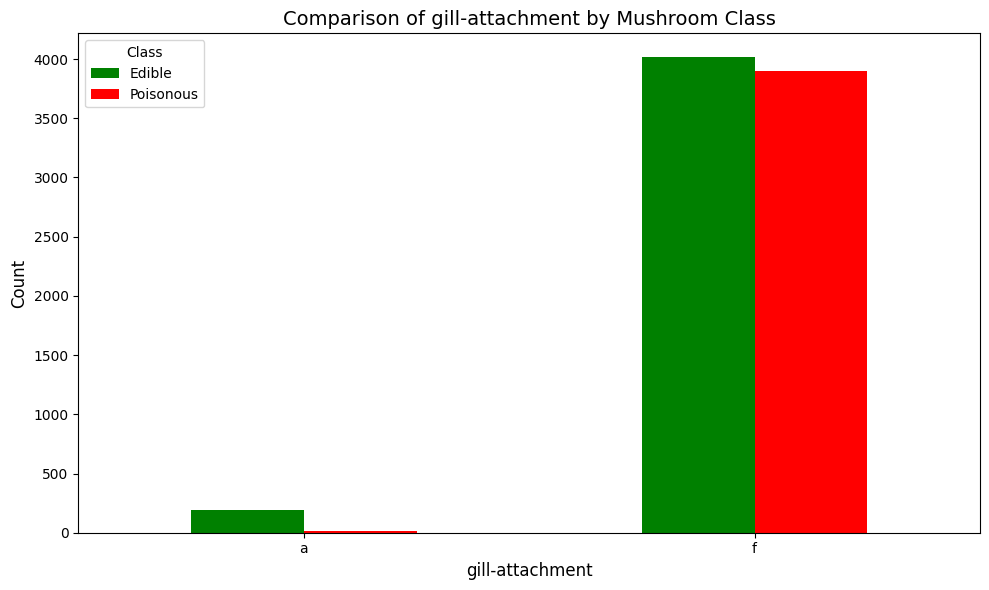

<Figure size 1000x600 with 0 Axes>

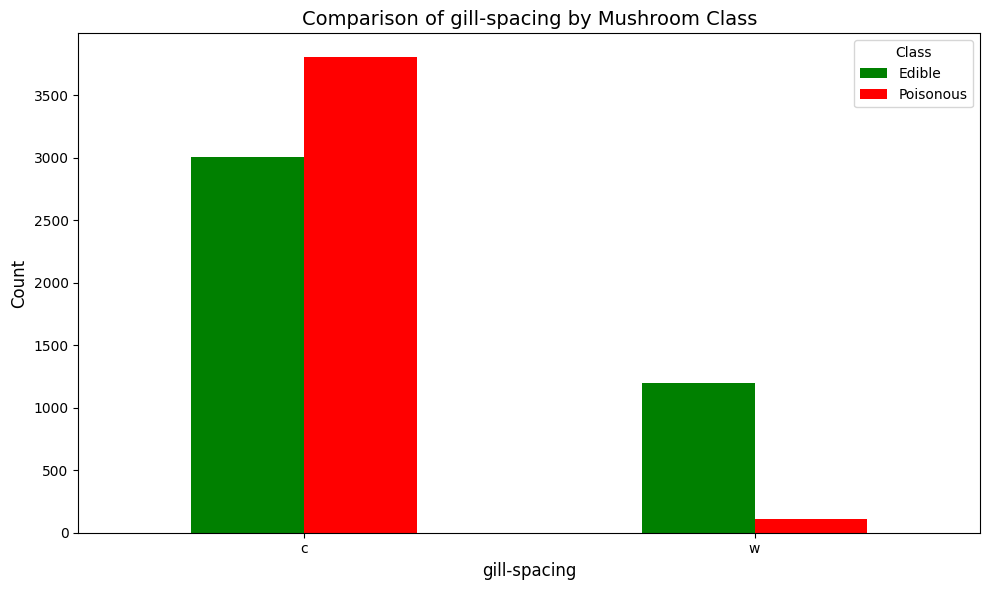

<Figure size 1000x600 with 0 Axes>

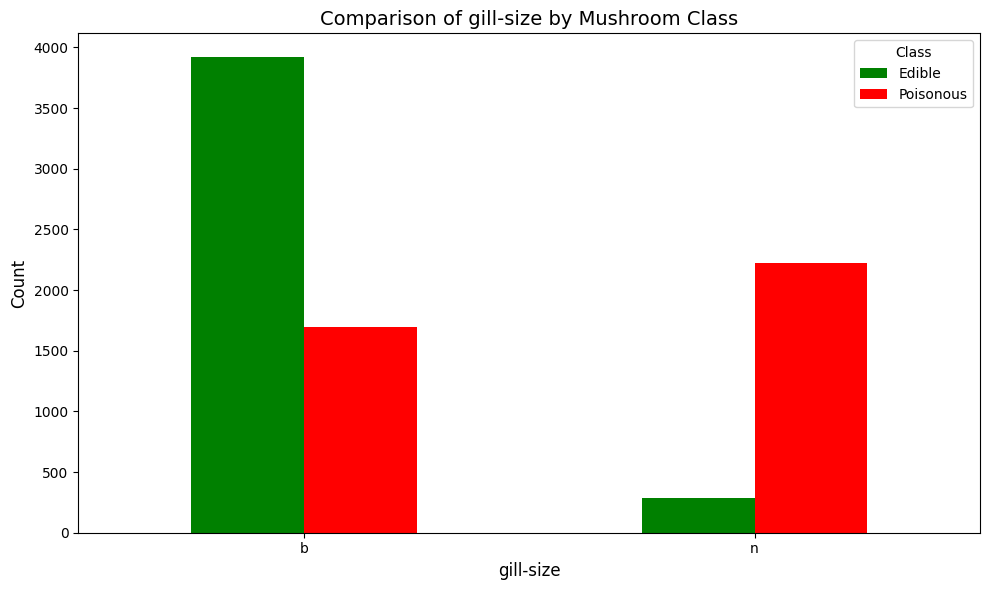

<Figure size 1000x600 with 0 Axes>

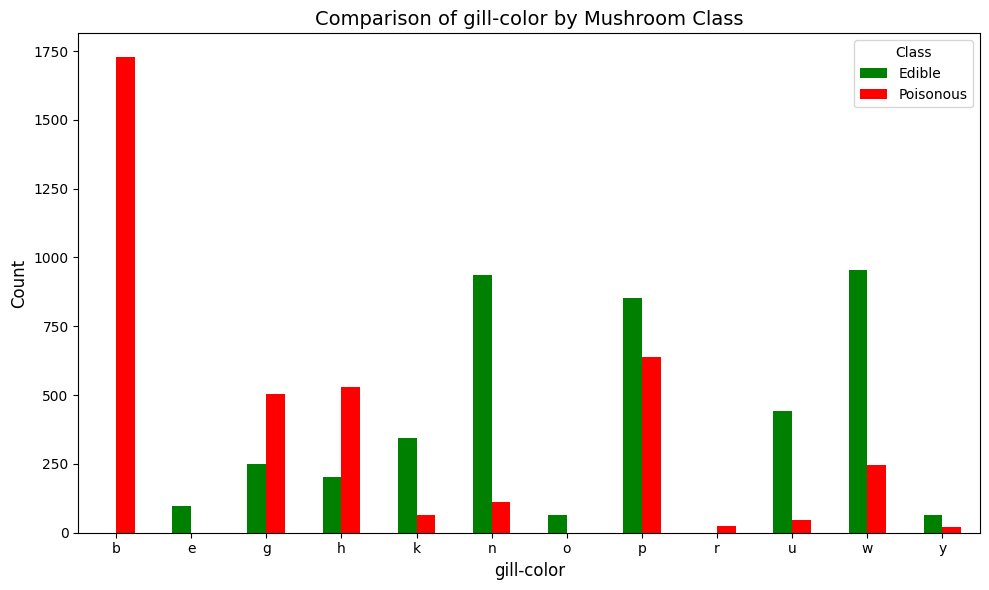

<Figure size 1000x600 with 0 Axes>

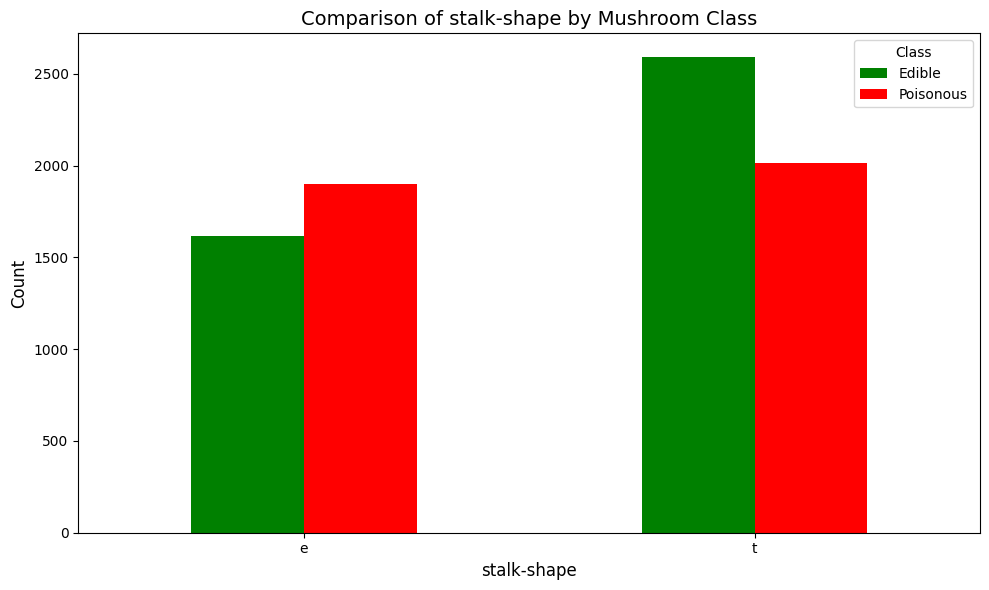

<Figure size 1000x600 with 0 Axes>

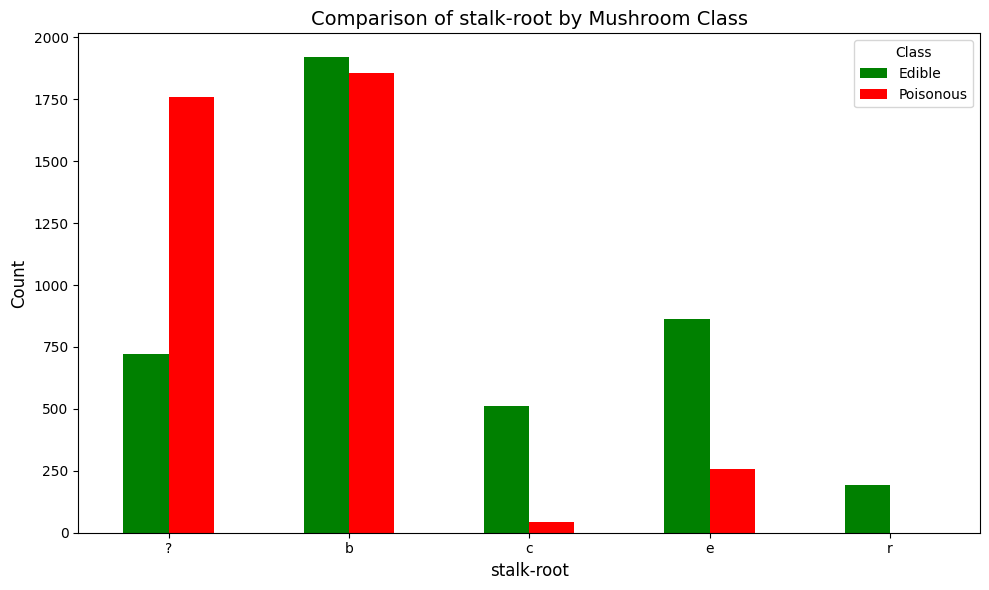

<Figure size 1000x600 with 0 Axes>

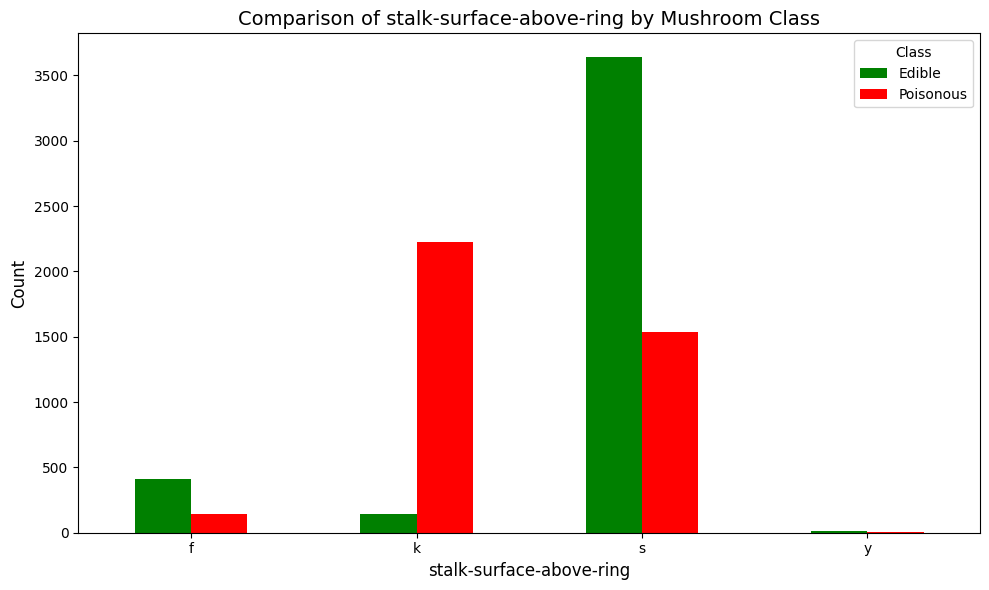

<Figure size 1000x600 with 0 Axes>

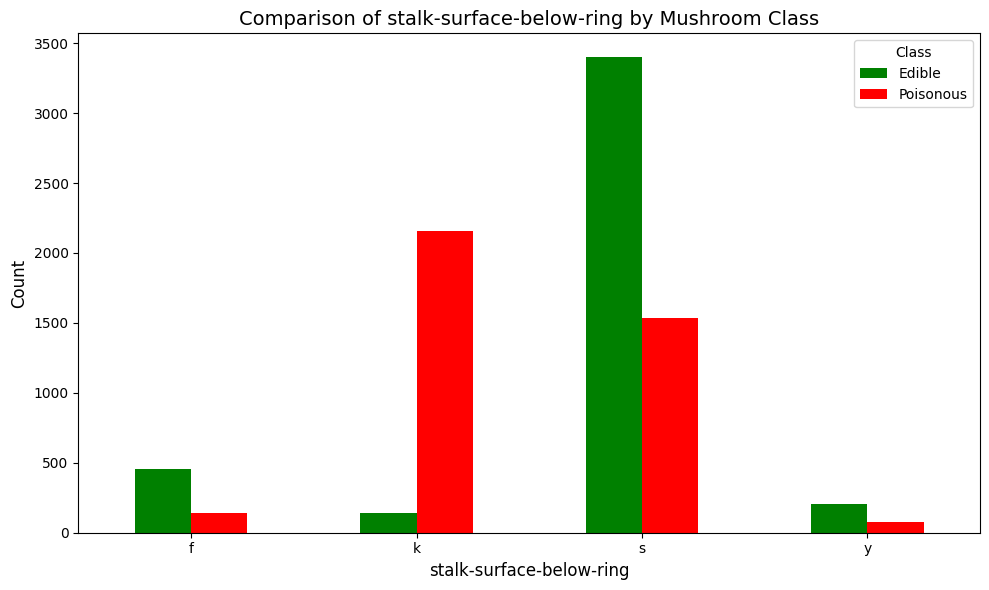

<Figure size 1000x600 with 0 Axes>

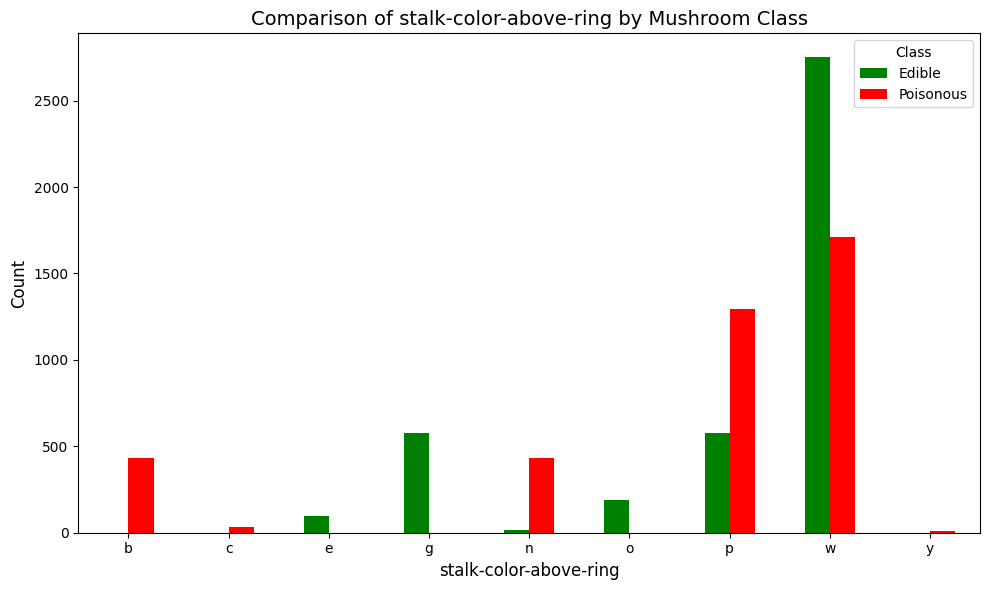

<Figure size 1000x600 with 0 Axes>

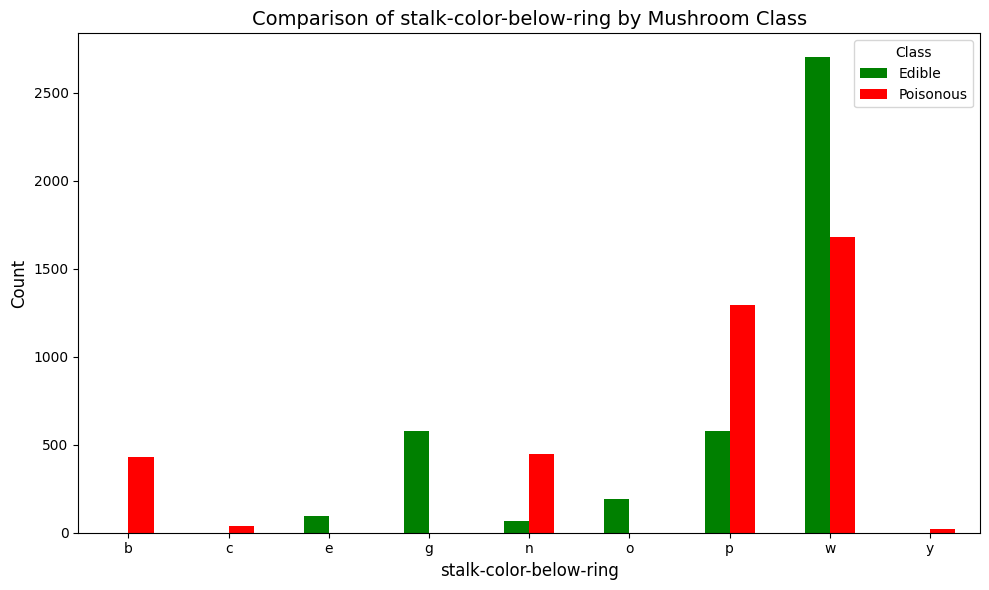

<Figure size 1000x600 with 0 Axes>

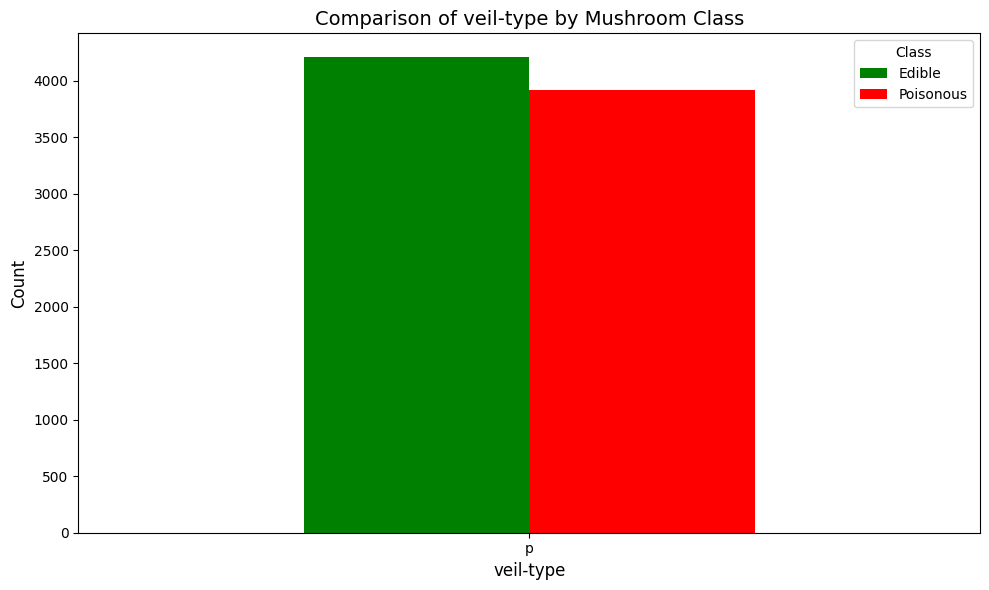

<Figure size 1000x600 with 0 Axes>

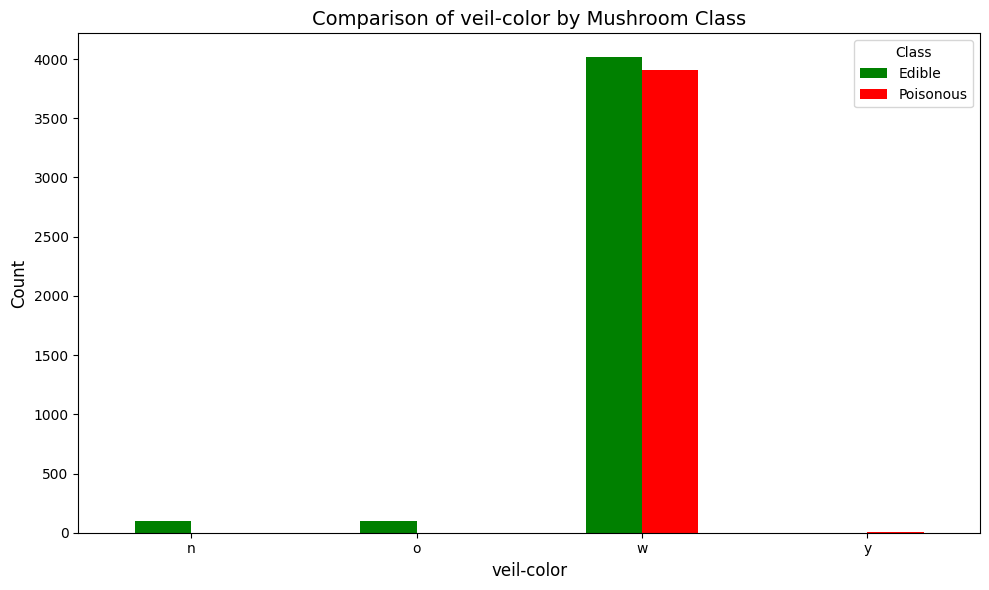

<Figure size 1000x600 with 0 Axes>

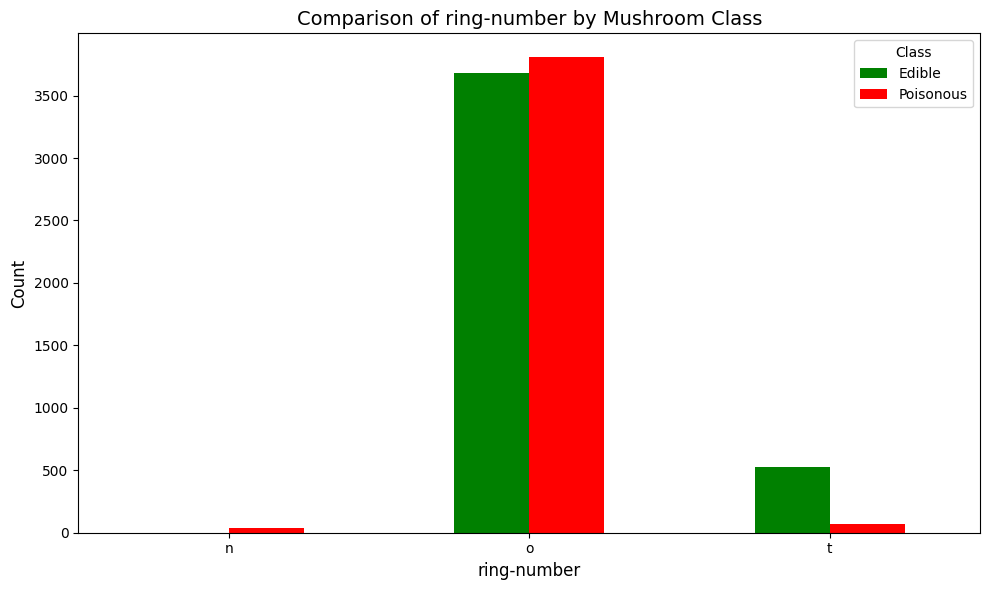

<Figure size 1000x600 with 0 Axes>

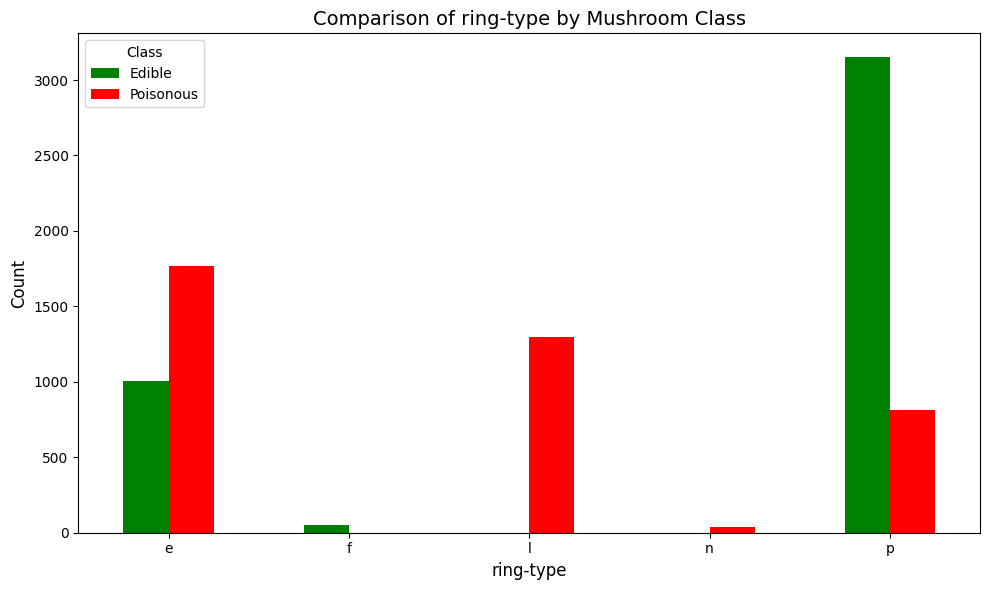

<Figure size 1000x600 with 0 Axes>

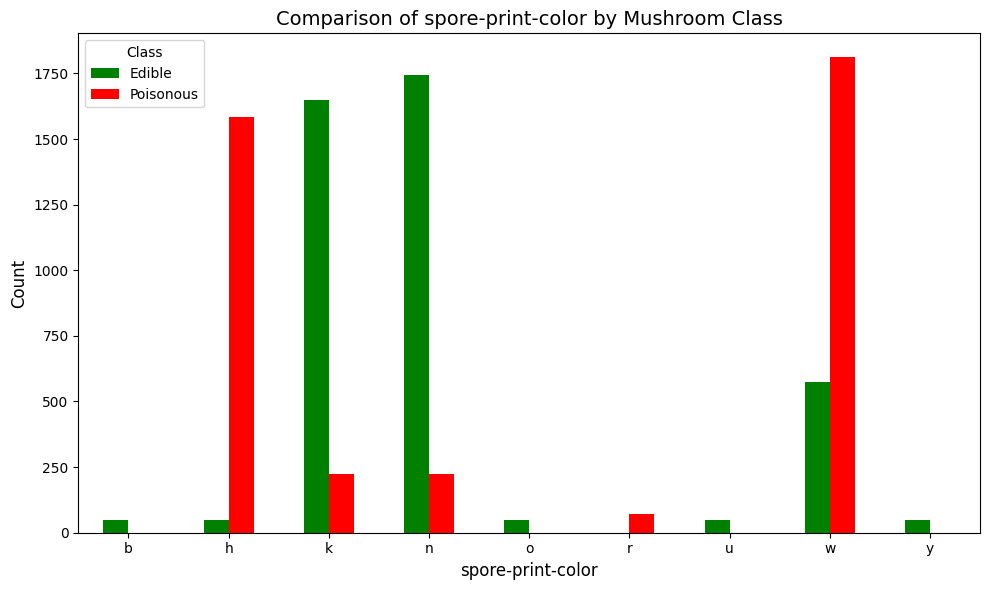

<Figure size 1000x600 with 0 Axes>

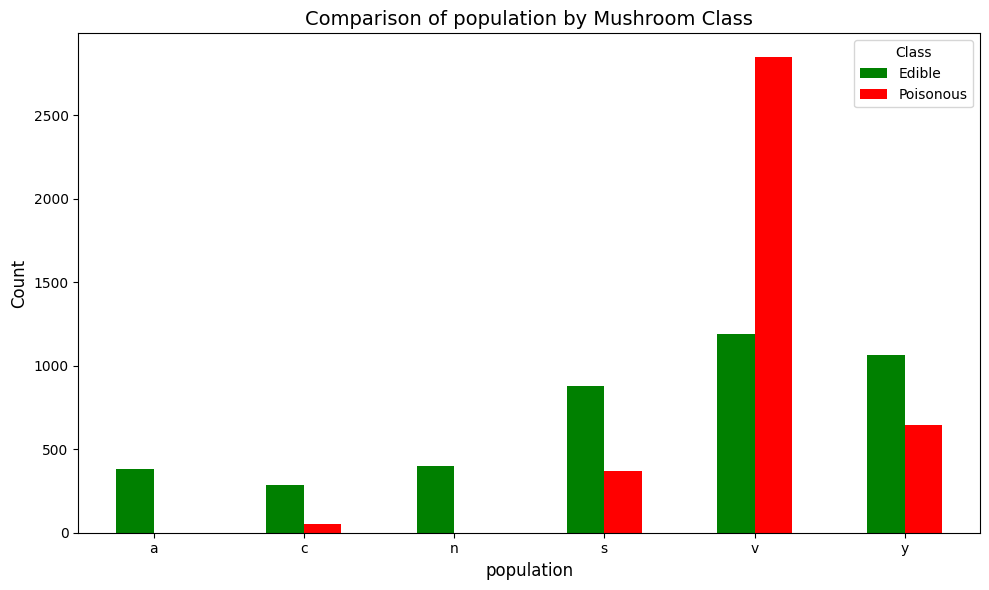

<Figure size 1000x600 with 0 Axes>

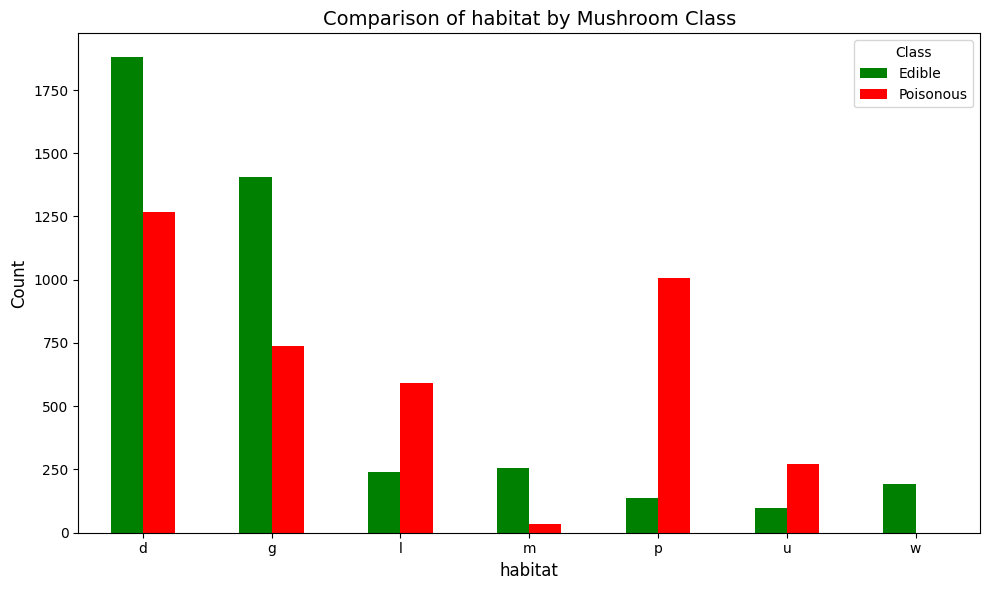

In [45]:
# For classification: compare histogram every feature between the classes. Lots of examples of this in class.
categorical_columns = df.drop(columns=['class']).columns.tolist()
custom_palette={0: 'green', 1: 'red'}
class_labels={0: 'Edible', 1: 'Poisonous'}

for col in categorical_columns:
    plt.figure(figsize=(10,6))
    
    grouped=df.groupby([col, 'class']).size().unstack().fillna(0)
    
    grouped.plot(kind='bar', color=[custom_palette[0], custom_palette[1]], figsize=(10,6))
    
    plt.title(f'Comparison of {col} by Mushroom Class', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Class', labels=[class_labels[0], class_labels[1]])
    plt.tight_layout()
    plt.show()

In [46]:
for col in categorical_columns:
    print(f"\nCrosstab for: {col}")
    table=pd.crosstab(df[col], df['class'], margins=True)
    table.columns=['Edible (0)', 'Poisonous (1)', 'Total']
    print(table)



Crosstab for: cap-shape
           Edible (0)  Poisonous (1)  Total
cap-shape                                  
b                 404             48    452
c                   0              4      4
f                1596           1556   3152
k                 228            600    828
s                  32              0     32
x                1948           1708   3656
All              4208           3916   8124

Crosstab for: cap-surface
             Edible (0)  Poisonous (1)  Total
cap-surface                                  
f                  1560            760   2320
g                     0              4      4
s                  1144           1412   2556
y                  1504           1740   3244
All                4208           3916   8124

Crosstab for: cap-color
           Edible (0)  Poisonous (1)  Total
cap-color                                  
b                  48            120    168
c                  32             12     44
e                 624        

In [47]:
# Most promising features were bruises, odor, gill-size, gill-color, stalk-surface-above-ring, stalk-surface-below-ring, ring-type

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [48]:
# Perform any data cleaning. Be clear what are you doing, for what feature.
missing_values=['?', 'NA', 'N/A', '0', 'NaN']

for placeholder in missing_values:
    print(f"Checking for {placeholder}:\n")
    print((df == placeholder).sum())  

Checking for ?:

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
Checking for NA:

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachme

In [49]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [50]:
df['stalk-root'].value_counts(dropna=False)


stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [51]:
df=df.drop('stalk-root', axis=1)
# dropping stalk-root because of too many missing values and not one of my selected features 

In [52]:
# Duplicates
duplicate_rows=df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 0


In [53]:
print(df.dtypes.value_counts())

object    21
int64      1
Name: count, dtype: int64


In [54]:
df.dtypes[df.dtypes=='int64']

class    int64
dtype: object

In [55]:
selected_features=['bruises', 'odor', 'gill-size', 'gill-color', 
                     'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type']

df[selected_features].dtypes
# rescaling not necessary 

bruises                     object
odor                        object
gill-size                   object
gill-color                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
ring-type                   object
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['bruises']=label_encoder.fit_transform(df['bruises'])
df['gill-size'] = label_encoder.fit_transform(df['gill-size'])

# Label Encoding to the bruises and gill-size

In [57]:
df=pd.get_dummies(df, columns=['odor', 'gill-color',
                                 'stalk-surface-above-ring', 
                                 'stalk-surface-below-ring', 'ring-type'], 
                    drop_first=True)  
# One-Hot Encoding for the rest of the features 

In [58]:
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'spore-print-color', 'population',
       'habitat', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p'],
      dtype='object')


In [59]:
columns_to_drop=['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 
                   'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
                   'veil-color', 'ring-number', 'spore-print-color', 'population', 'habitat']

df=df.drop(columns=columns_to_drop)
print(df.columns)

Index(['class', 'bruises', 'gill-size', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p'],
      dtype='object')


In [60]:
categorical_features = [
    'bruises', 'gill-size', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
    'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g',
    'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
    'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
    'gill-color_y', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
    'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
    'stalk-surface-below-ring_y', 'ring-type_f', 'ring-type_l',
    'ring-type_n', 'ring-type_p'
]

for feature in categorical_features:
    print(f"Distribution of {feature}:")
    print(df[feature].value_counts())
    print('-' * 50)


Distribution of bruises:
bruises
0    4748
1    3376
Name: count, dtype: int64
--------------------------------------------------
Distribution of gill-size:
gill-size
0    5612
1    2512
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_c:
odor_c
False    7932
True      192
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_f:
odor_f
False    5964
True     2160
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_l:
odor_l
False    7724
True      400
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_m:
odor_m
False    8088
True       36
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_n:
odor_n
False    4596
True     3528
Name: count, dtype: int64
--------------------------------------------------
Distribution of odor_p:
odor_p
False    7868
True      2

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm to work. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

* Once trained, apply the ML algorithm the the test dataset and generate the submission file.


In [61]:
# make sure your target is properly encoded also.
# I had already done these steps in the previous section including removing-  
# - one hot encoded categorical features and checking for any duplicated columns 


In [62]:
X=df.drop(columns=['class'])
y=df['class']              

print(X.shape) 
print(y.shape)
print(y.isna().sum()) 

(8124, 31)
(8124,)
0


In [63]:
# Split training sample into train, validation, and test sub-samples.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Training: {X_train.shape}, Validation: {X_val.shape}, Testing: {X_test.shape}")

Training: (6499, 31), Validation: (812, 31), Testing: (813, 31)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3366
           1       1.00      0.99      1.00      3133

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       391

    accuracy                           1.00       812
   macro avg       1.00      1.00      1.00       812
weighted avg       1.00      1.00      1.00       812

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       392

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



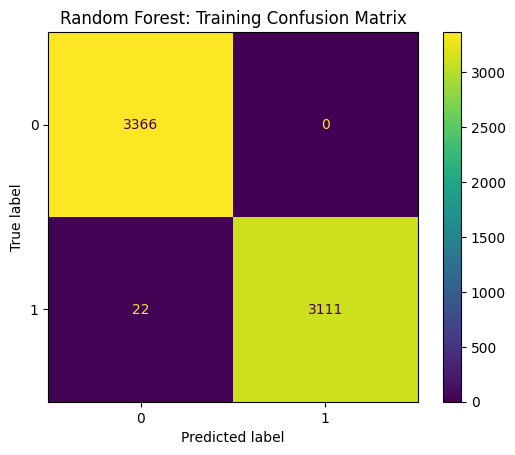

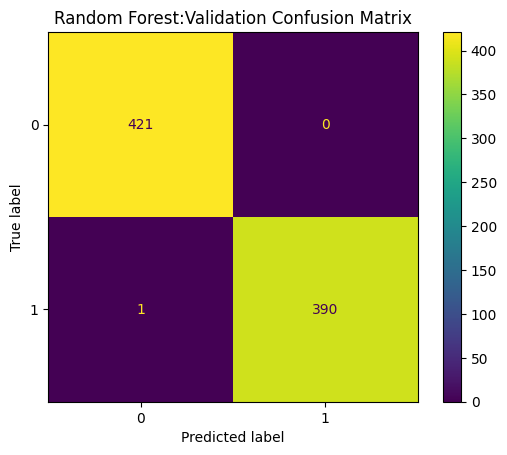

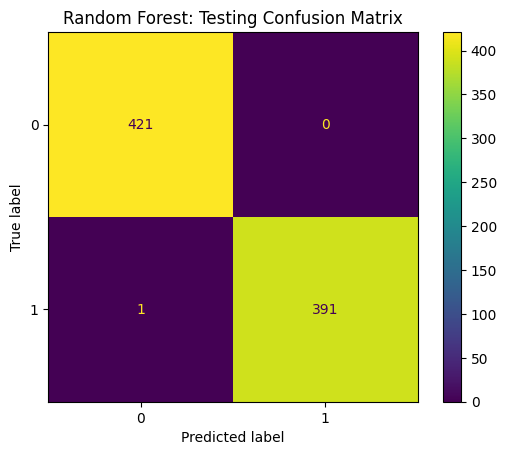

In [64]:
# Random Forest 
# Train 
rf_model_before=RandomForestClassifier(random_state=42)
rf_model_before.fit(X_train, y_train)
y_pred_train=rf_model_before.predict(X_train)
print(classification_report(y_train, y_pred_train))

#validation 
y_pred_val=rf_model_before.predict(X_val)
print(classification_report(y_val, y_pred_val))

#Test 
y_pred_test=rf_model_before.predict(X_test)
print(classification_report(y_test, y_pred_test))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model_before, X_train, y_train)
plt.title("Random Forest: Training Confusion Matrix")
plt.show()

# Validation 
ConfusionMatrixDisplay.from_estimator(rf_model_before, X_val, y_val)
plt.title("Random Forest:Validation Confusion Matrix")
plt.show()

# Testing
ConfusionMatrixDisplay.from_estimator(rf_model_before, X_test, y_test)
plt.title("Random Forest: Testing Confusion Matrix")
plt.show()

Naive Bayes: Training
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3366
           1       1.00      0.98      0.99      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Naive Bayes: Validation 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       421
           1       1.00      0.97      0.99       391

    accuracy                           0.99       812
   macro avg       0.99      0.99      0.99       812
weighted avg       0.99      0.99      0.99       812


Naive Bayes: Testing 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       421
           1       1.00      0.98      0.99       392

    accuracy                           0.99       813
   macro avg       0.99      0.99      0.99       813
wei

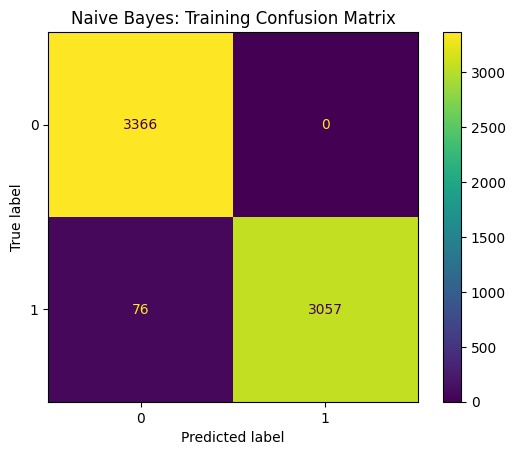

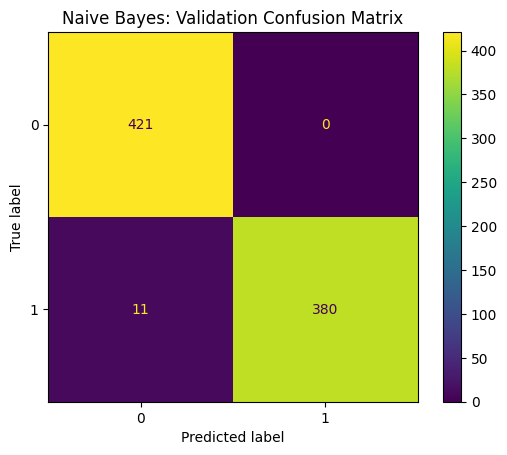

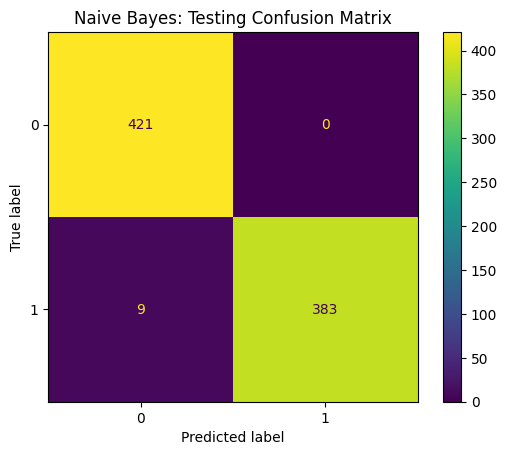

In [65]:
# Naive Bayes 

# Train
nb_model_before=GaussianNB()
nb_model_before.fit(X_train, y_train)
y_pred_train_nb=nb_model_before.predict(X_train)
print("Naive Bayes: Training")
print(classification_report(y_train, y_pred_train_nb))

# Validation
y_pred_val_nb=nb_model_before.predict(X_val)
print("\nNaive Bayes: Validation ")
print(classification_report(y_val, y_pred_val_nb))

#Test
y_pred_test_nb=nb_model_before.predict(X_test)
print("\nNaive Bayes: Testing ")
print(classification_report(y_test, y_pred_test_nb))

#Confusion Matrices
ConfusionMatrixDisplay.from_estimator(nb_model_before, X_train, y_train)
plt.title("Naive Bayes: Training Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(nb_model_before, X_val, y_val)
plt.title("Naive Bayes: Validation Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(nb_model_before, X_test, y_test)
plt.title("Naive Bayes: Testing Confusion Matrix")
plt.show()


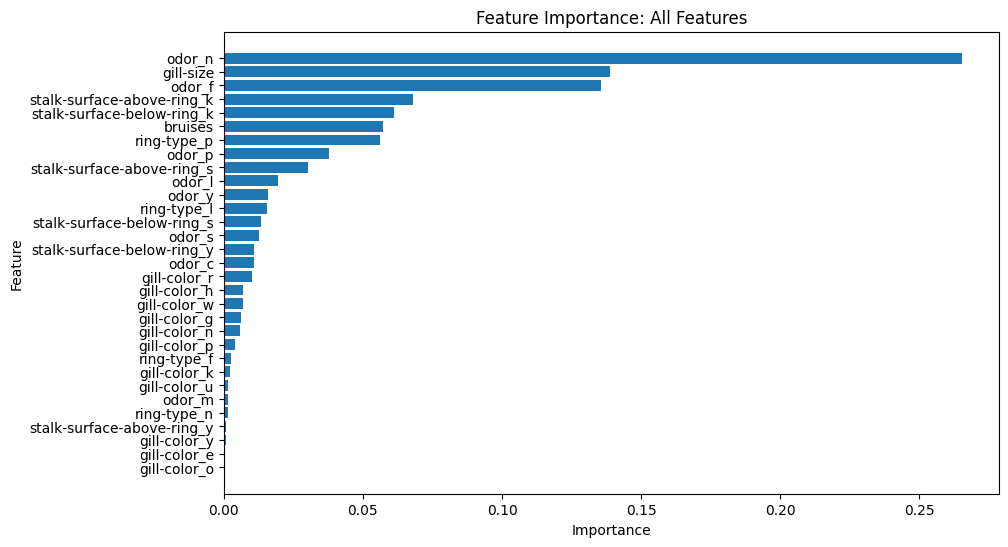

In [70]:
feature_importances=rf_model_before.feature_importances_

sorted_idx=feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.title('Feature Importance: All Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [71]:
remove_features=['odor_n', 'gill-size', 'odor_f']
X_reduced=X.drop(columns=remove_features)
print(X_reduced.shape)



(8124, 28)


Training: (6499, 28), Validation: (812, 28), Testing: (813, 28)
Random Forest: Training Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3366
           1       1.00      0.97      0.99      3133

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Random Forest: Validation Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       421
           1       1.00      0.97      0.99       391

    accuracy                           0.99       812
   macro avg       0.99      0.99      0.99       812
weighted avg       0.99      0.99      0.99       812


Random Forest: Testing Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       421
           1       1

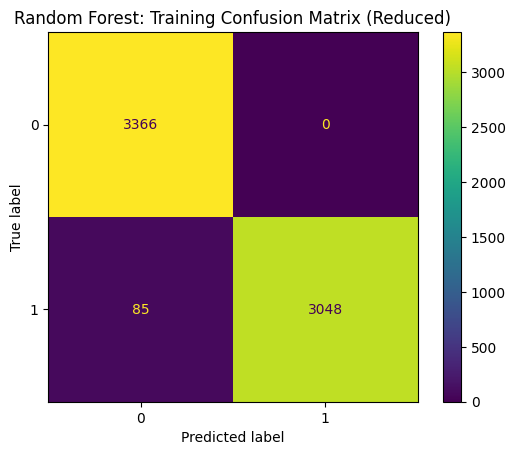

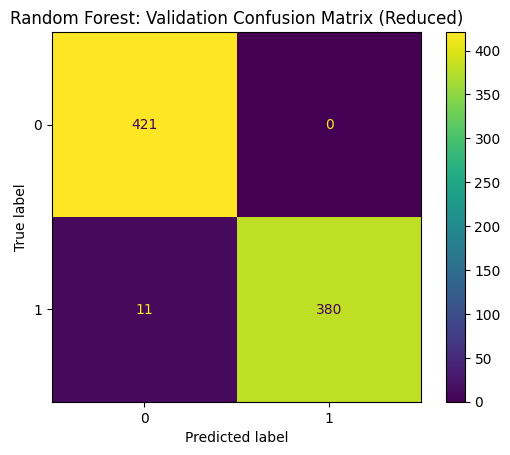

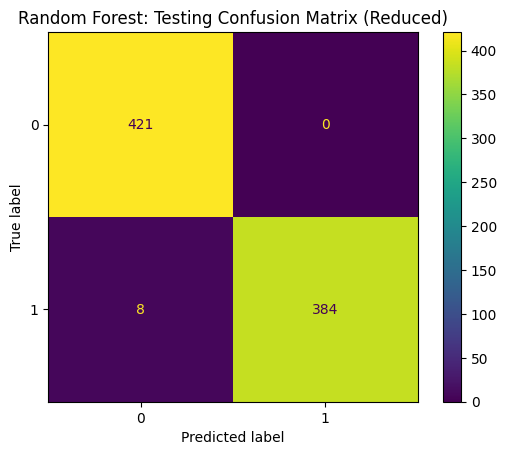

In [73]:
# Random Forest 


X_train_reduced, X_temp, y_train, y_temp = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
X_val_reduced, X_test_reduced, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Training: {X_train_reduced.shape}, Validation: {X_val_reduced.shape}, Testing: {X_test_reduced.shape}")

# Train
rf_model_reduced=RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Training
y_pred_train=rf_model_reduced.predict(X_train_reduced)
print("Random Forest: Training Report (Reduced Features)")
print(classification_report(y_train, y_pred_train))

# Validation
y_pred_val=rf_model_reduced.predict(X_val_reduced)
print("\nRandom Forest: Validation Report (Reduced Features)")
print(classification_report(y_val, y_pred_val))

# Testing
y_pred_test=rf_model_reduced.predict(X_test_reduced)
print("\nRandom Forest: Testing Report (Reduced Features)")
print(classification_report(y_test, y_pred_test))

# Confusion Matrices
ConfusionMatrixDisplay.from_estimator(rf_model_reduced, X_train_reduced, y_train)
plt.title("Random Forest: Training Confusion Matrix (Reduced)")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_model_reduced, X_val_reduced, y_val)
plt.title("Random Forest: Validation Confusion Matrix (Reduced)")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_model_reduced, X_test_reduced, y_test)
plt.title("Random Forest: Testing Confusion Matrix (Reduced)")
plt.show()


Naive Bayes: Training Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3366
           1       1.00      0.75      0.86      3133

    accuracy                           0.88      6499
   macro avg       0.91      0.88      0.88      6499
weighted avg       0.90      0.88      0.88      6499


Naive Bayes: Validation Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       421
           1       1.00      0.77      0.87       391

    accuracy                           0.89       812
   macro avg       0.91      0.88      0.89       812
weighted avg       0.91      0.89      0.89       812


Naive Bayes: Testing Report (Reduced Features)
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       421
           1       1.00      0.76      0.86       392

    accuracy                       

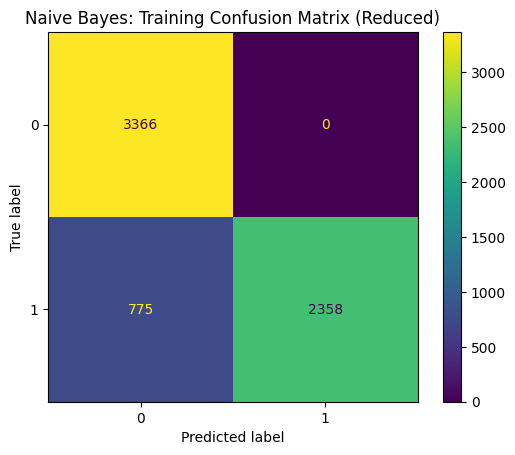

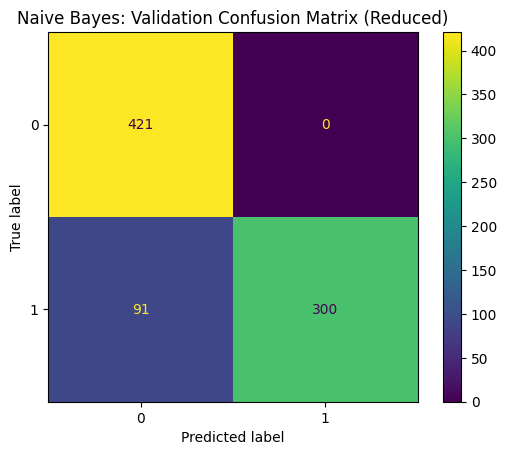

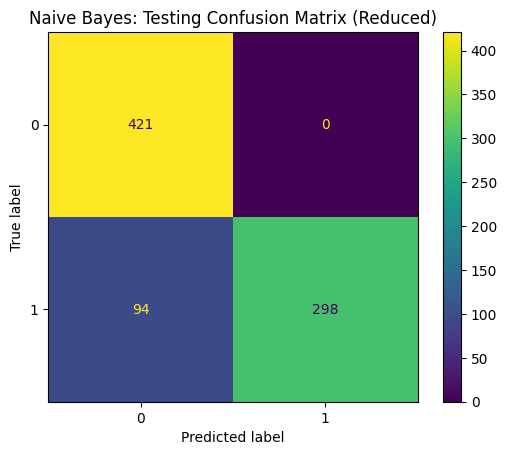

In [74]:
# Naive Bayes 

# Train
nb_model_reduced=GaussianNB()
nb_model_reduced.fit(X_train_reduced, y_train)

# Training
y_pred_train_nb=nb_model_reduced.predict(X_train_reduced)
print("Naive Bayes: Training Report (Reduced Features)")
print(classification_report(y_train, y_pred_train_nb))

# Validation
y_pred_val_nb=nb_model_reduced.predict(X_val_reduced)
print("\nNaive Bayes: Validation Report (Reduced Features)")
print(classification_report(y_val, y_pred_val_nb))

# Testing
y_pred_test_nb=nb_model_reduced.predict(X_test_reduced)
print("\nNaive Bayes: Testing Report (Reduced Features)")
print(classification_report(y_test, y_pred_test_nb))

# Confusion Matrices
ConfusionMatrixDisplay.from_estimator(nb_model_reduced, X_train_reduced, y_train)
plt.title("Naive Bayes: Training Confusion Matrix (Reduced)")
plt.show()

ConfusionMatrixDisplay.from_estimator(nb_model_reduced, X_val_reduced, y_val)
plt.title("Naive Bayes: Validation Confusion Matrix (Reduced)")
plt.show()

ConfusionMatrixDisplay.from_estimator(nb_model_reduced, X_test_reduced, y_test)
plt.title("Naive Bayes: Testing Confusion Matrix (Reduced)")
plt.show()
